This notebook is part of [**Byron v0.8**](https://pypi.org/project/byron/)  
Copyright 2023-24 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://opensource.org/license/apache-2-0/) 

In [1]:
import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_12399/1429530752.py:1: ByronPerformanceWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://github.com/cad-polito-it/byron/blob/alpha/docs/paranoia.md for details]
  import byron


In [3]:
import golang

framework = golang.framework()

1

In [4]:
foo = byron.f.macro('foo {num}', num=byron.f.integer_parameter(0, 1000))
subs = byron.f.bunch([foo], size=1)
bar = byron.f.macro('bar {foo}', foo=byron.f.global_reference(subs, creative_zeal=1))
main = byron.f.sequence([foo, bar], max_instances=1)
framework = main

2

In [5]:
byron.rrandom.seed(42)
i1, *_ = byron.operators.random_individual(framework)
i2, *_ = byron.operators.random_individual(framework)
byron.f.as_text(i1)
byron.f.as_lgp(i1)
byron.f.as_forest(i1)
byron.f.as_text(i2)
byron.f.as_lgp(i2)
byron.f.as_forest(i2)

2

In [5]:
offspring = None
while not offspring:
    offspring = byron.operators.single_node_crossover(i1, i2)
o, *_ = offspring

// 🖋 n11 ➜ Frame❬FrameSequence#3❭
foo 773  // 🖋 n11.n12 ➜ Macro❬User#6❭
bar n15  // 🖋 n11.n13 ➜ Macro❬User#7❭
// 🖋 n14 ➜ Frame❬SingleMacro#1❭
n15:
foo 370  // 🖋 n14.n15 ➜ Macro❬User#6❭


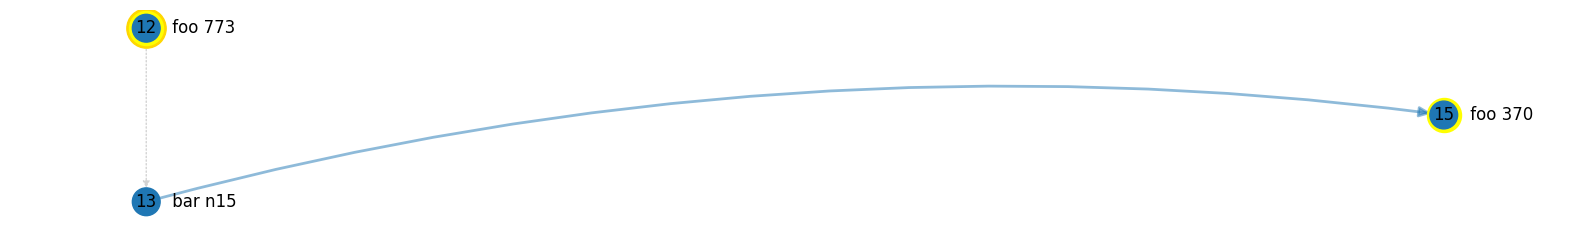

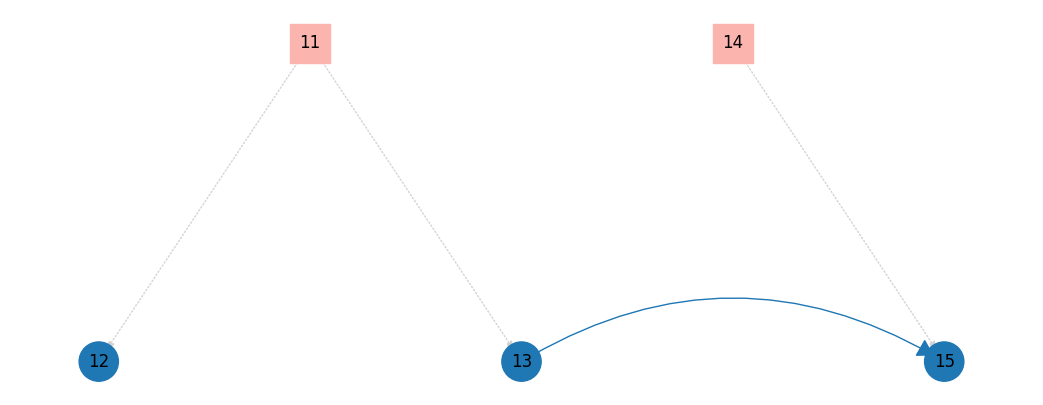

In [6]:
byron.f.as_text(o)
byron.f.as_lgp(o)
byron.f.as_forest(o)

In [ ]:
o.run_paranoia_checks()